 <center>

<h1>Infilect Deep Learning Assignment </h1>
</center>
<h2> Name: Aman India</h2>


<h3>Given a set of images captured in grocery stores(shelf image), and a set of close up images of products in
    those stores, your task is as follows.</h3>
    <ol>
  <li>For every product image, ﬁnd the location of that product in all shelf images in which it appears.</li>
  <li>For every shelf image, locate all products and assign the name from given set of product images.</li>
</ol>










<h3> Soluction 2 : </h3>
<h4> Approach : Deep Neural Network Based</h4> 
<p> This approach is based on classification using  </p>

<h4>Steps included in the approach are :</h4>
<ul>
    <li>Reading Product and Shelf Images</li>
    <li>Visualizing the data</li>
    <li>Labelling the Product Data</li>
    <li>Using data Argumentation to create more data</li>
    <li>Doing Split in test and train</li>
    <li>Training model</li>
    <li>Predicting the Output</li>
    <li>Saving thre Output</li>
    <li>Writing in the soluction.txt file </li>
    <li>Problem Statement done</li>
    
</ul>




### Importing Needed Pacakages


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

import os
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import imgaug.augmenters as iaa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# this is an important module to use to serialize the image names in proper sorted order
from natsort import natsorted

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from tqdm import tqdm

2022-07-19 13:23:01.832665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 13:23:01.832683: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


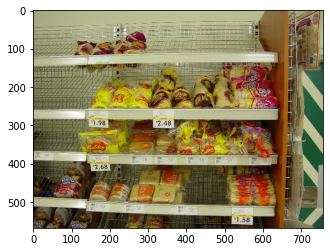

In [ ]:
# sample shelf image
shelf_img_path = '../../data/shelf_images/db1.jpg'
plt.imshow(plt.imread(shelf_img_path))

### Clonning ScaledYolov4 as using yolo for object detection

In [ ]:
# clone Scaled_YOLOv4
!git clone https://github.com/roboflow-ai/ScaledYOLOv4.git # clone repo
#checkout the yolov4-large branch
!git checkout yolov4-large


SyntaxError: invalid syntax (3219038972.py, line 2)

In [ ]:
#install mish activation function for cuda
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda



In [ ]:
!python mish-cuda/setup.py build install

/home/tl107/Aman_place/aman/lib/python3.8/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
No CUDA runtime is found, using CUDA_HOME='/usr'
/usr/lib/python3.8/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_ext
/home/tl107/Aman_place/aman/lib/python3.8/site-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.w

In [ ]:
# install pyYaml
!pip install -U PyYAML


Requirement already up-to-date: PyYAML in /home/tl107/Aman_place/aman/lib/python3.8/site-packages (6.0)


### Command for Detection using Resnetframework

In [ ]:
!python ScaledYOLOv4/detect.py --weights last_yolov4-p5-results_strip.pt --source ../../shelf_images --output detected_shelf_objects --img-size 896 --save-txt

Traceback (most recent call last):
  File "ScaledYOLOv4/detect.py", line 13, in <module>
    from models.experimental import attempt_load
  File "/home/tl107/Aman_place/Assignment/Infilect Assignment Aman/2-DNNwithannotated/ScaledYOLOv4/models/experimental.py", line 7, in <module>
    from models.common import Conv, DWConv
  File "/home/tl107/Aman_place/Assignment/Infilect Assignment Aman/2-DNNwithannotated/ScaledYOLOv4/models/common.py", line 7, in <module>
    from mish_cuda import MishCuda as Mish
ModuleNotFoundError: No module named 'mish_cuda'


In [ ]:
# this is an important module to use to serialize the image names in proper sorted order
from natsort import natsorted

In [ ]:
# find product images
product_path = '../../data/product_images/'
# fetch product image list
img_list = natsorted(os.listdir(product_path))
print(img_list)

['qr1.jpg', 'qr2.jpg', 'qr3.jpg', 'qr4.jpg', 'qr5.jpg', 'qr6.jpg', 'qr7.jpg', 'qr8.jpg', 'qr9.jpg', 'qr10.jpg', 'qr11.jpg', 'qr12.jpg', 'qr13.jpg', 'qr14.jpg', 'qr15.jpg', 'qr16.jpg', 'qr17.jpg', 'qr18.jpg', 'qr19.jpg', 'qr20.jpg', 'qr21.jpg', 'qr22.jpg', 'qr23.jpg', 'qr24.jpg', 'qr25.jpg', 'qr26.jpg', 'qr27.jpg', 'qr28.jpg', 'qr29.jpg', 'qr30.jpg', 'qr31.jpg', 'qr32.jpg', 'qr33.jpg', 'qr34.jpg', 'qr35.jpg', 'qr36.jpg', 'qr37.jpg', 'qr38.jpg', 'qr39.jpg', 'qr40.jpg', 'qr41.jpg', 'qr42.jpg', 'qr43.jpg', 'qr44.jpg', 'qr45.jpg', 'qr46.jpg', 'qr47.jpg', 'qr48.jpg', 'qr49.jpg', 'qr50.jpg', 'qr51.jpg', 'qr52.jpg', 'qr53.jpg', 'qr54.jpg', 'qr55.jpg', 'qr56.jpg', 'qr57.jpg', 'qr58.jpg', 'qr59.jpg', 'qr60.jpg', 'qr61.jpg', 'qr62.jpg', 'qr63.jpg', 'qr64.jpg', 'qr65.jpg', 'qr66.jpg', 'qr67.jpg', 'qr68.jpg', 'qr69.jpg', 'qr70.jpg', 'qr71.jpg', 'qr72.jpg', 'qr73.jpg', 'qr74.jpg', 'qr75.jpg', 'qr76.jpg', 'qr77.jpg', 'qr78.jpg', 'qr79.jpg', 'qr80.jpg', 'qr81.jpg', 'qr82.jpg', 'qr83.jpg', 'qr84.jpg', 

### Labelling product images with id f rom 1 to 100

In [ ]:
#Creating list ofnumbers from 1 to 100
class_labels = [i for i in range(0,100)]
img_name = img_list[0]
cls_id = 0
img_df = pd.DataFrame(columns = ['img_path', 'cls_id'])
for img_id, img in enumerate(img_list):
  img_path = os.path.join(product_path, img)
  id = (int(img.split('.')[0].split('qr')[1]))
  if (id-1)!=0 and (id-1)%3==0:
    cls_id+=1
    img_df.loc[img_id, 'img_path'] = img_path
    img_df.loc[img_id, 'cls_id'] = str(class_labels[cls_id])

  else:
    img_df.loc[img_id, 'img_path'] = img_path
    img_df.loc[img_id, 'cls_id'] = str(class_labels[cls_id])

# print the dataset
img_df

,img_path,cls_id
0,../../data/product_images/qr1.jpg,0
1,../../data/product_images/qr2.jpg,0
2,../../data/product_images/qr3.jpg,0
3,../../data/product_images/qr4.jpg,1
4,../../data/product_images/qr5.jpg,1
...,...,...
295,../../data/product_images/qr296.jpg,98
296,../../data/product_images/qr297.jpg,98
297,../../data/product_images/qr298.jpg,99
298,../../data/product_images/qr299.jpg,99


In [ ]:
#img_path_list = [plt.imread(path) for path in img_df['img_path']]
img_list = []
labels_list = []
# define cropped_dimension
(w,h) = (1200,1200)
for img_id_, path in enumerate(img_df['img_path']):
  img_ = plt.imread(path)
  center = [el/2 for el in img_.shape[:2]]
  #print(center)
  x = center[1] - w/2
  y = center[0] - h/2
  img_ = img_[int(y):int(y+h), int(x):int(x+w)]
  img_ = tf.keras.preprocessing.image.smart_resize(img_, size = (256,256), interpolation='bicubic')
  # this maintains(normalizes) the pixel values between 0 and 1
  img_-=img_.min()
  img_/=(img_.max()-img_.min())
  # append images in a list
  img_list.append(img_)
  labels_list.append(img_df['cls_id'][img_id_])

2022-07-19 13:32:03.387203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 13:32:03.387673: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tl107/Aman_place/aman/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-19 13:32:03.387737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tl107/Aman_place/aman/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-19 13:32:03.387789: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'

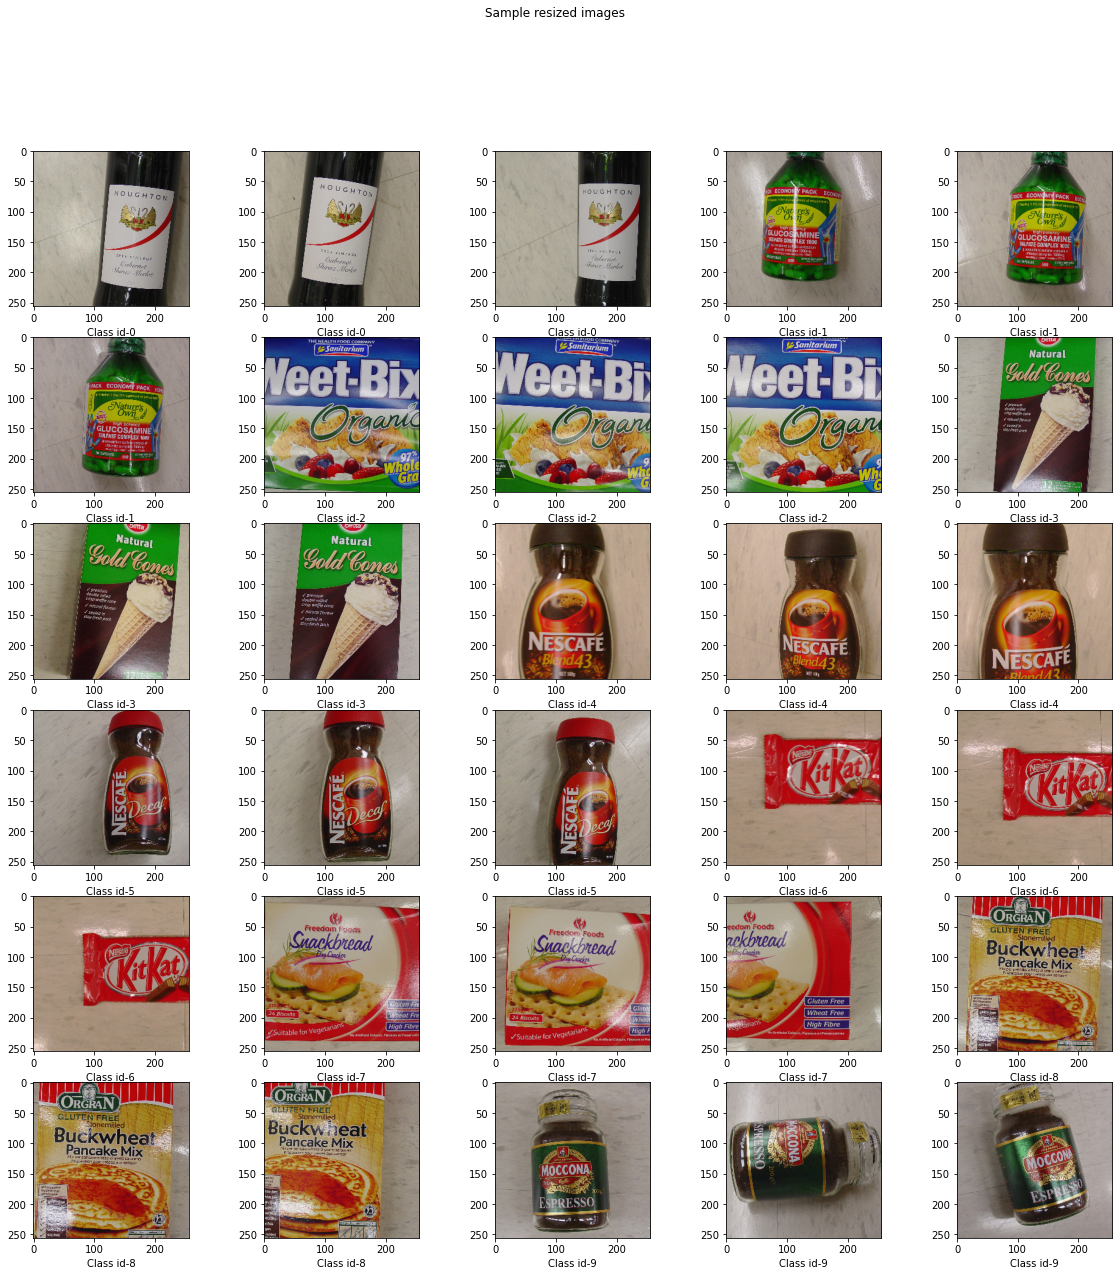

In [ ]:
# plot 30 sample images
fig = plt.figure(figsize=(20,20))
fig.suptitle('Sample resized images')
for i in range(30):
  fig.add_subplot(6,5,i+1)
  plt.imshow(img_list[i])
  plt.xlabel(f'Class id-{labels_list[i]}')

In [ ]:
img_array = np.array(img_list, dtype = np.float32)
label_array = np.array(labels_list, dtype = np.int32)

print(f'Dataset shape {img_array.shape, label_array.shape}')
print(f'Dataset dtype {img_array.dtype, label_array.dtype}')

Dataset shape ((300, 256, 256, 3), (300,))
Dataset dtype (dtype('float32'), dtype('int32'))


**Define data augmentation functions on the dataset**

For data augmentation we use image-augmentor module, where we utilized the following functionalities-

* Auto-contrast
* Auto-sharpness
* Auto-rotate(-10 t +10 deg)
* Auto-enhance color
* Auto equalize hist

1st apply all on ooriginal image, then applied all on rotated image, so we obtain 10 augmented samples

In [ ]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    new_img
    return new_img

# image aug function for the dataset having the specified class index
def img_aug(dataset,label, class_idx = 0):
  # fetch the index of the given class idx
  idx_list = [i for i,j in enumerate(label) if j==class_idx]

  # define augmentor objects for auto_contrast, flip with prob=1
  auto_contrast = iaa.pillike.Autocontrast()
  # auto-brightness
  auto_brightness = iaa.imgcorruptlike.Brightness()
  # auto-sharpness
  sharpness = iaa.pillike.EnhanceSharpness()
  # auto-rotate
  rotate = iaa.Rotate(rotate = (-10,10), order=1)
  eq = iaa.pillike.Equalize()
  ec = iaa.pillike.EnhanceColor()

  img_list = list(dataset)

  # augmented images list initialized with dataset
  aug_list = img_list
  # augmented label list initiallized with dataset
  aug_label_list = list(label)
  
  for idx in idx_list:
    img = img_list[idx]
    
    # auto contrast
    img_con = convert(img,0,255,np.uint8)
    img_con = auto_contrast.augment_image(img_con)
    img_con = convert(img_con,0,1,np.float32)
    aug_list.append(img_con)
    aug_label_list.append(class_idx)
    
    # auto-brightness
    img_b = convert(img,0,255,np.uint8)
    img_b = auto_brightness.augment_image(img_b)
    img_b = convert(img_b,0,1,np.float32)
    aug_list.append(img_b)
    aug_label_list.append(class_idx)

    # auto-sharpness
    img_s = convert(img,0,255,np.uint8)
    img_s = sharpness.augment_image(img_s)
    img_s = convert(img_s,0,1,np.float32)
    aug_list.append(img_s)
    aug_label_list.append(class_idx)

    # auto-equalize
    img_eq = convert(img,0,255,np.uint8)
    img_eq = eq.augment_image(img_eq)
    img_eq = convert(img_eq,0,1,np.float32)
    aug_list.append(img_eq)
    aug_label_list.append(class_idx)

    # auto-enhance color
    img_ec = convert(img,0,255,np.uint8)
    img_ec = ec.augment_image(img_ec)
    img_ec = convert(img_ec,0,1,np.float32)
    aug_list.append(img_ec)
    aug_label_list.append(class_idx)

    # auto-rotate
    img_r = convert(img,0,255,np.uint8)
    img_r = rotate.augment_image(img_r)
    img_r = convert(img_r,0,1,np.float32)
    aug_list.append(img_r)
    aug_label_list.append(class_idx)

    # auto contrast
    img_con = convert(img_r,0,255,np.uint8)
    img_con = auto_contrast.augment_image(img_con)
    img_con = convert(img_con,0,1,np.float32)
    aug_list.append(img_con)
    aug_label_list.append(class_idx)
    
    # auto-brightness
    img_b = convert(img_r,0,255,np.uint8)
    img_b = auto_brightness.augment_image(img_b)
    img_b = convert(img_b,0,1,np.float32)
    aug_list.append(img_b)
    aug_label_list.append(class_idx)

    # auto-sharpness
    img_s = convert(img_r,0,255,np.uint8)
    img_s = sharpness.augment_image(img_s)
    img_s = convert(img_s,0,1,np.float32)
    aug_list.append(img_s)
    aug_label_list.append(class_idx)

    # auto-equalize
    img_eq = convert(img_r,0,255,np.uint8)
    img_eq = eq.augment_image(img_eq)
    img_eq = convert(img_eq,0,1,np.float32)
    aug_list.append(img_eq)
    aug_label_list.append(class_idx)

    # auto-enhance color
    img_ec = convert(img_r,0,255,np.uint8)
    img_ec = ec.augment_image(img_ec)
    img_ec = convert(img_ec,0,1,np.float32)
    aug_list.append(img_ec)
    aug_label_list.append(class_idx)

  aug_img_array = np.array(aug_list, dtype=np.float32)
  # normalize the values between 0 and 1
  aug_img_array = aug_img_array - aug_img_array.min()
  aug_label_list_array = np.array(aug_label_list, dtype=np.int32) 
  
  assert aug_img_array.shape[0] == aug_label_list_array.shape[0]
  
  return aug_img_array, aug_label_list_array

In [ ]:
# obtain augmented image and labels pair for all the classes
for cls in class_labels:
  if cls==0:
    aug_img, aug_label = img_aug(img_array, label_array, class_idx=cls)
  else:
    aug_img, aug_label = img_aug(aug_img, aug_label, class_idx=cls)

In [ ]:
print(f'Augmented Dataset shape {aug_img.shape, aug_label.shape}')
print(f'Augmented dtype {aug_img.dtype, aug_label.dtype}')

Augmented Dataset shape ((3600, 256, 256, 3), (3600,))
Augmented dtype (dtype('float32'), dtype('int32'))


In [ ]:
print(f'Total images correponding to individual categories after augmentation {list(aug_label).count(0)}')

Total images correponding to individual categories after augmentation 36


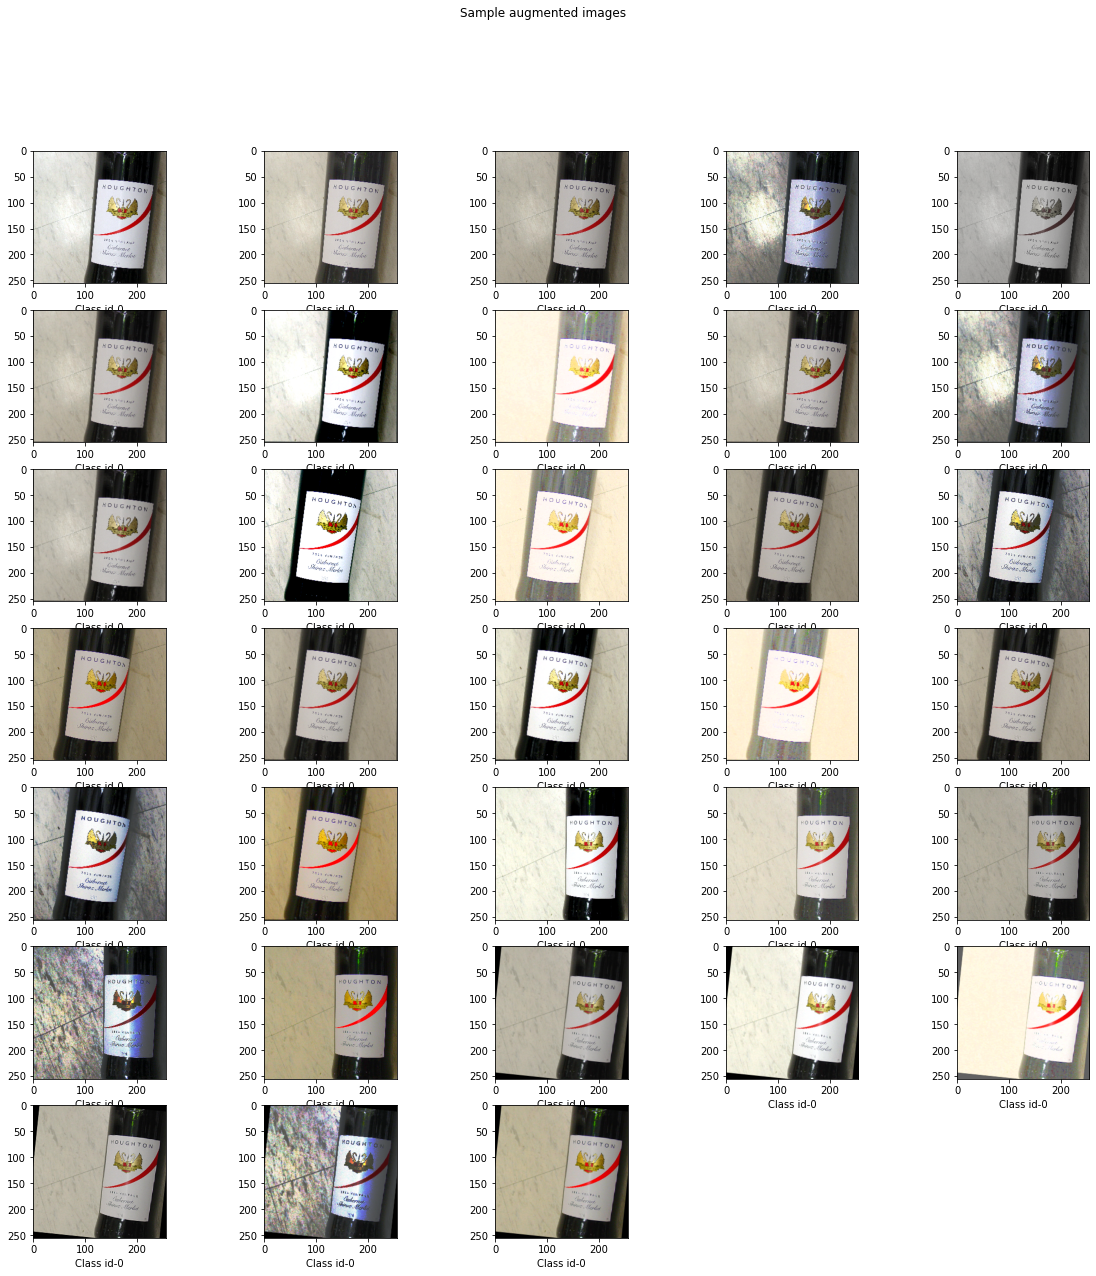

In [ ]:
# plot 30 sample images
fig = plt.figure(figsize=(20,20))
fig.suptitle('Sample augmented images')
for i in range(33):
  fig.add_subplot(7,5,i+1)
  plt.imshow(aug_img[300+i])
  plt.xlabel(f'Class id-{aug_label[300+i]}')

**Train validation split**

* As dataset is very small, we are considering only train and validation set with shuffling

* We have choosen test_ratio = 0.1665, for train and valid main i.e total 31 images are used for training for each class, rest will be for test single image, i.e. 1 image for validation and 1 image will be used for testing

In [ ]:
train_img, valid_main_img, train_label, valid_main_label = train_test_split(aug_img,
                                                                  aug_label,
                                                                  stratify = aug_label,
                                                                  test_size = 0.1665,
                                                                  shuffle = True,
                                                                  random_state = 42) 

valid_img, test_img, valid_label, test_label = train_test_split(valid_main_img,
                                                                  valid_main_label,
                                                                  stratify = valid_main_label,
                                                                  test_size = 0.5,
                                                                  shuffle = True,
                                                                  random_state = 42) 

In [ ]:
print(f'Train set dimension and datatype {train_img.shape, train_img.dtype, train_label.shape, train_label.dtype}')
print(f'Validation set dimension {valid_img.shape, valid_img.dtype, valid_label.shape, valid_label.dtype}')
print(f'Test set dimension and datatype {test_img.shape, test_img.dtype, test_label.shape, test_label.dtype}')


Train set dimension and datatype ((3000, 256, 256, 3), dtype('float32'), (3000,), dtype('int32'))
Validation set dimension ((300, 256, 256, 3), dtype('float32'), (300,), dtype('int32'))
Test set dimension and datatype ((300, 256, 256, 3), dtype('float32'), (300,), dtype('int32'))


In [ ]:
def create_resnet50v2_model():
  conv_base = tf.keras.applications.ResNet50V2(
    include_top=False, 
    weights='imagenet', 
    input_shape=(256, 256, 3),
    pooling='avg'
  )
  
  model = Sequential()
  model.add(conv_base)
  model.add(Dense(100, activation='softmax'))

  return model

In [ ]:
model = create_resnet50v2_model()

94668760/94668760 [==============================] - 12s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
Total params: 23,769,700
Trainable params: 23,724,260
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
# here we are freezing the base model
def freeze_model(model):
  for layer in model.layers:
    layer.trainable = False

In [ ]:
conv_base = model.get_layer('resnet50v2')
#classifier = model.get_layer('dense_1')

# Freeze convolutional base
freeze_model(conv_base)
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Unfreeze the last few layers of the convolutional base
#for layer in conv_base.layers:
##  if layer.name.startswith('conv5_block3') or layer.name.startswith('post'):
 #   layer.trainable = True

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
Total params: 23,769,700
Trainable params: 204,900
Non-trainable params: 23,564,800
_________________________________________________________________


/home/tl107/Aman_place/aman/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# plot accuracy urve
def plot_accuracy_curves(history):  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
 
  epochs = range(1, len(acc) + 1)
 
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

# plot loss curve
def plot_loss_curves(history): 

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
def plot_curves(history): 
  plt.figure(figsize=(18,6))
  plt.subplot(1,2,1)
  plot_accuracy_curves(history)
  plt.subplot(1,2,2)
  plot_loss_curves(history)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
mc_filepath = os.path.join('/content/drive/MyDrive', 'product_best_model.h5')
mcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=mc_filepath, monitor='val_loss',verbose = 1, save_best_only=True, save_freq=375, mode ='min')

In [ ]:
history = model.fit(x = train_img, y = train_label, batch_size= 16, epochs = 10, verbose=1, validation_data=(valid_img, valid_label), callbacks=[mcheckpoint])

2022-07-19 13:34:03.252057: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2359296000 exceeds 10% of free system memory.


Epoch 1/10


2022-07-19 13:34:06.732340: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2022-07-19 13:34:06.980052: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69222400 exceeds 10% of free system memory.
2022-07-19 13:34:07.090107: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2022-07-19 13:34:07.140121: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.


188/188 [==============================] - 95s 492ms/step - loss: 1.0175 - acc: 0.8533 - val_loss: 0.0842 - val_acc: 0.9967
Epoch 2/10
188/188 [==============================] - 95s 505ms/step - loss: 0.0408 - acc: 1.0000 - val_loss: 0.0319 - val_acc: 0.9967
Epoch 3/10
188/188 [==============================] - 95s 506ms/step - loss: 0.0179 - acc: 1.0000 - val_loss: 0.0189 - val_acc: 1.0000
Epoch 4/10
188/188 [==============================] - 97s 514ms/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 5/10
188/188 [==============================] - 93s 496ms/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 6/10
188/188 [==============================] - 94s 499ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 7/10
188/188 [==============================] - 99s 526ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 8/10
188/188 [==============================] - 97s 514ms/st

In [ ]:
# save trained model
model.save('product_best_model.h5')

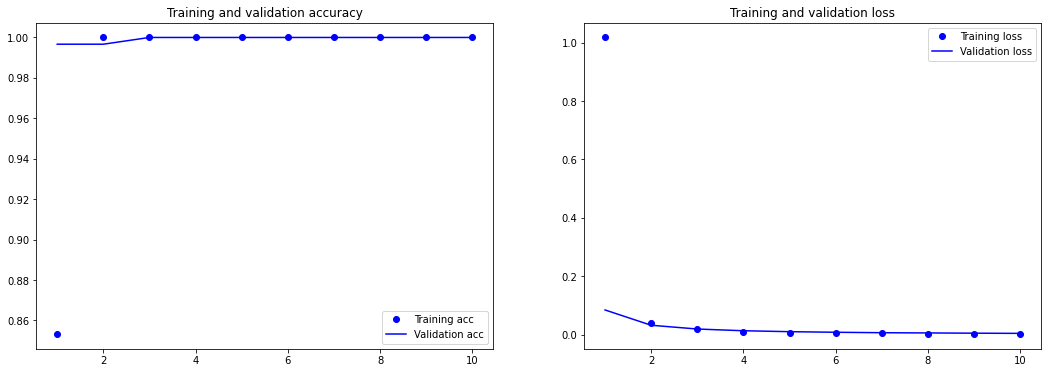

In [ ]:
plot_curves(history)

In [ ]:
model.evaluate(test_img, test_label)

10/10 [==============================] - 8s 780ms/step - loss: 0.0035 - acc: 1.0000


[0.0034747361205518246, 1.0]

In [ ]:
test_pred = model.predict(test_img)
test_pred = np.argmax(test_pred, 1)
print(test_pred)

10/10 [==============================] - 8s 787ms/step
[32 84 93 50 44 94 17 99 63 46 53 89 96 84 10  5 52 90 56 16 47 88 70 74
 90 88  8 87 66 64 89 24 23 91 69 75  9 71 19 13 30 27 79 98 79 72 76 85
 37 88 11 25 36 54 33 19 52 38 25 80 46 21 46 50  0 29 28  7 29  3 16 60
 43 38  3 12 54 44 57 62 80 69  6  6 55 34 42 72 51 82 61 45 47 95 33 55
 18 74 93 77 35 26 52 41 72 27 91 45 39 42 62 49 13 10 54 71  2 18  7 80
 41 40 20 90 65  1 92 95 70 73 10 65 49 19 21 63 92 33 13 27 61 62 58 68
 73 56 48 58 22 94 22 67  4 48 77 14 92 28  5 96 59 39  4 57 12  5 91 81
 81  0  2 81 60 77 97 36 43 67  9  4 65 42 66 59 32 37 78 70 11 66 86 71
 15 20 35 31 18 40 15  8 24 75 14 99 58 85 15 29  3 97 99 23 49  7 74 56
 30 69  1  6 48 87 40 20 59 53 30 51 76 31 64  8 85 93 34 43  2 47 94 87
 96 26 60 50 36 38 67 79 14 78 41 98 64 17  1 97 22 61 45 44 26 98 35 82
  9 55 82 32 75 83 63 34 24 21 76 68 84 37 83 73 78 17 89 86 39 53 83 51
 12 23 31 11 95 86 68 57 16  0 25 28]


Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
     

<AxesSubplot:>

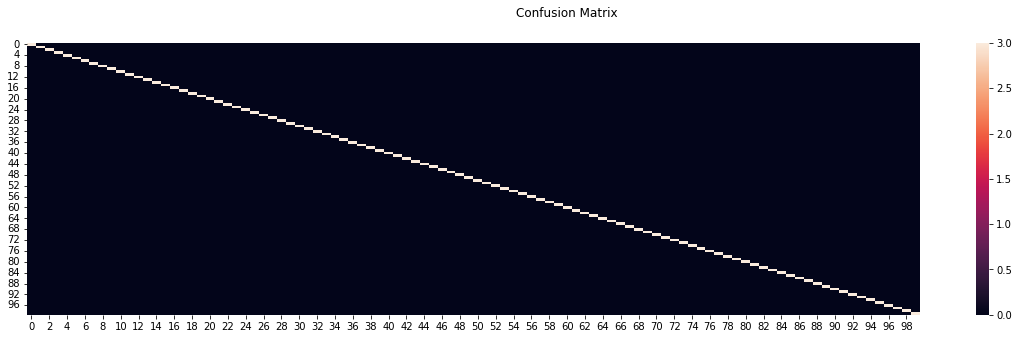

In [ ]:
print(f'Classification report {metrics.classification_report(test_label, test_pred)}')

fig_cm = plt.figure(figsize=(20,5))
fig_cm.suptitle('Confusion Matrix')
sns.heatmap(confusion_matrix(test_label, test_pred))

In [ ]:
txt_path = 'detected_shelf_objects'

# fetch list of text files
# natsorted keeps the original file serial number instead of default conversion
txt_files = [file_ for file_ in natsorted(os.listdir(txt_path)) if file_.endswith('.txt')]

img_path = '../../data/shelf_images'
# fetch images
img_files = [file_ for file_ in natsorted(os.listdir(img_path)) if file_.endswith('.jpg')]


In [ ]:
print(f'Total detected text files available - {len(txt_files)}')
print(f'Total img files files available - {len(img_files)}')

Total detected text files available - 0
Total img files files available - 3153


In [ ]:
# weight path
weight_file = 'product_best_model.h5'
model.load_weights(weight_file)

In [ ]:
def form_line(id1, id2, x_min, y_min, x_max, y_max):
  line = str(id1)+', '+str(id2)+', '+str(x_min)+', '+str(y_min)+', '+str(x_max)+', '+str(y_max)+ '\n'
  return line

In [ ]:
# define lines string for solution 1
lines_1 = ''
# define lines string for solution 2
lines_2 = ''

for txt in tqdm(txt_files):
  id = txt.split('.txt')[0]
  demo_txt = os.path.join(txt_path, txt_files[1])
  demo_img = os.path.join(img_path, id+'.jpg')
  
  img_shape = np.flip(np.array(plt.imread(demo_img).shape[:2]))
  #print(img_shape)
  img = plt.imread(demo_img)

  with open(demo_txt, 'r') as demo:
    for line in demo.readlines():
      (x_,y_,w_,h_) = line.split()[1:]
      # x, y, w, h are obtained from deteted record
      x = int(float(x_)*float(img_shape[0]))
      y = int(float(y_)*float(img_shape[1]))
      w = int(float(w_)*float(img_shape[0]))
      h = int(float(h_)*float(img_shape[1]))
      
      # x_min, y_min (top left corner of image)
      x1 = int(x - (w/2))
      y1 = int(y - (h/2))
      # as in image the dimension is flipped i.e y:x
      img_ = np.array(img[y1:y1+h, x1:x1+w])

      # resize image to (1, 256,256, 3)
      img_res = tf.keras.preprocessing.image.smart_resize(img_, size = (256,256), interpolation='bicubic')
      img_res = img_res - img_res.min()
      img_res = img_res/(img_res.max() - img_res.min())
      img_res = np.expand_dims(img_res, axis = 0)
      
      # define model prediction
      y_pred = model.predict(img_res)
      y_pred = np.argmax(y_pred, 1)
      
      # evaluate box parameters
      x_min = x1
      y_min = y1
      x_max = x1 + w
      y_max = y1 + h
      
      # fetches the serial no of shelf image
      id_key = id.split('db')[1] 
      #print(id_key)
      # line for soln1, where input is product image
      lines_1 += form_line(y_pred[0], id_key, x_min, y_min, x_max, y_max)
      # here input is only shelf image
      lines_2 += form_line(id_key, y_pred[0], x_min, y_min, x_max, y_max)
    
#plt.imshow(plt.imread(demo_img))

0it [00:00, ?it/s]


In [ ]:
#Writing in Soluction_1 

soln_1_path ='solutions/solution_1.txt'
if not os.path.isfile(soln_1_path):
  f_1 = open(soln_1_path, 'x')
  f_1.close()

with open(soln_1_path, 'w') as s1:
  s1.write(lines_1)

In [ ]:
#Writing in Soluction_2
soln_2_path ='solutions/solution_2.txt'
if not os.path.isfile(soln_2_path):
  f_2 = open(soln_2_path, 'x')
  f_2.close()

with open(soln_2_path, 'w') as s2:
  s2.write(lines_2)



####################################################